In [8]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def initialize_lattice(L):
    return np.random.choice([-1, 1], size=(L, L))

def compute_energy(lattice):
    L = lattice.shape[0]
    E = 0
    for i in range(L):
        for j in range(L):
            S = lattice[i, j]
            neighbors = lattice[(i+1)%L, j] + lattice[i, (j+1)%L]
            E += -S * neighbors
    return E

def compute_magnetization(lattice):
    return np.sum(lattice)

def wolff_update(lattice, T):
    L = lattice.shape[0]
    visited = np.zeros_like(lattice, dtype=bool)
    i, j = np.random.randint(0, L), np.random.randint(0, L)
    cluster_spin = lattice[i, j]
    p_add = 1 - np.exp(-2 / T)

    stack = [(i, j)]
    visited[i, j] = True

    while stack:
        x, y = stack.pop()
        for dx, dy in [(-1,0), (1,0), (0,-1), (0,1)]:
            xn, yn = (x + dx) % L, (y + dy) % L
            if not visited[xn, yn] and lattice[xn, yn] == cluster_spin:
                if np.random.rand() < p_add:
                    visited[xn, yn] = True
                    stack.append((xn, yn))

    lattice[visited] *= -1
    return lattice

def simulate_wolff(L, T, steps, thermalization=0.1):
    lattice = initialize_lattice(L)
    energies, magnetizations = [], []

    therm_steps = int(steps * thermalization)

    for step in range(steps):
        lattice = wolff_update(lattice, T)
        if step >= therm_steps:
            E = compute_energy(lattice)
            M = compute_magnetization(lattice)
            energies.append(E)
            magnetizations.append(abs(M))

    norm = L * L
    avg_E = np.mean(energies) / norm
    avg_M = np.mean(magnetizations) / norm
    C = (np.var(energies) / T**2) / norm
    chi = (np.var(magnetizations) / T) / norm

    return avg_E, avg_M, C, chi

def run_temperature_sweep_wolff(L=20, steps=5000, Tmin=1.5, Tmax=3.5, Tsteps=20):
    T_values = np.linspace(Tmin, Tmax, Tsteps)
    E_vals, M_vals, C_vals, X_vals = [], [], [], []

    print("Running Wolff temperature sweep:")
    for T in tqdm(T_values):
        avg_E, avg_M, C, chi = simulate_wolff(L, T, steps)
        E_vals.append(avg_E)
        M_vals.append(avg_M)
        C_vals.append(C)
        X_vals.append(chi)

    return T_values, E_vals, M_vals, C_vals, X_vals

def plot_vs_temperature(T, E, M, C, X):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(T, E, 'ro', markersize=5)
    plt.title('Average Energy per Spin')
    plt.xlabel('Temperature')
    plt.ylabel('Energy')

    plt.subplot(2, 2, 2)
    plt.plot(T, M, 'bo', markersize=5)
    plt.title('Average Magnetization per Spin')
    plt.xlabel('Temperature')
    plt.ylabel('Magnetization')

    plt.subplot(2, 2, 3)
    plt.plot(T, C, 'go', markersize=5)
    plt.title('Specific Heat per Spin')
    plt.xlabel('Temperature')
    plt.ylabel('C')

    plt.subplot(2, 2, 4)
    plt.plot(T, X, 'mo', markersize=5)
    plt.title('Susceptibility per Spin')
    plt.xlabel('Temperature')
    plt.ylabel('χ')

    plt.tight_layout()
    plt.show()


Running Wolff temperature sweep:


100%|██████████| 40/40 [01:28<00:00,  2.22s/it]


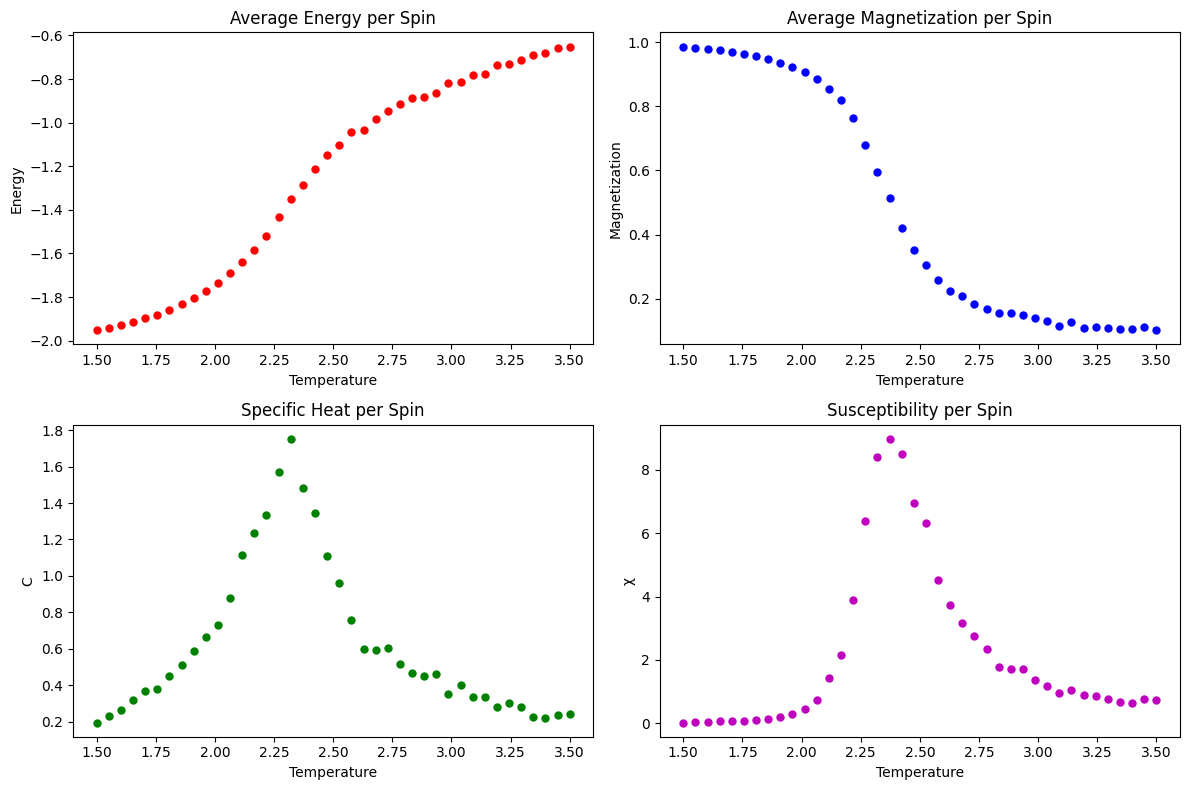

In [10]:
L = 20          # Lattice size
steps = 3000    # Total Wolff steps per temperature
Tmin = 1.5
Tmax = 3.5
Tsteps = 40

T, E, M, C, X = run_temperature_sweep_wolff(L, steps, Tmin, Tmax, Tsteps)
plot_vs_temperature(T, E, M, C, X)
